# **LEVEL 1** 💻

In [2]:
# Install necessary libraries (only needed if they aren't already installed)
!pip install seaborn
!pip install scikit-learn

# Import required libraries 
import pandas as pd     # For handling datasets
import numpy as np      # For numerical operations
import seaborn as sns   # For data visualization
import matplotlib.pyplot as plt     # For plotting graphs
from sklearn.model_selection import train_test_split    # For splitting data into training & testing sets 
from sklearn.feature_extraction.text import TfidfVectorizer     # For text feature extraction
from sklearn.linear_model import LogisticRegression     # Machine learning model
from sklearn.metrics import accuracy_score, classification_report   # Performance evaluation

In [ ]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("Competition_Dataset.csv")

In [4]:
# Display basic info about the dataset
df.info()       # Shows column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680826 entries, 0 to 680825
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Dates          680826 non-null  object 
 1   Category       680826 non-null  object 
 2   Descript       680826 non-null  object 
 3   DayOfWeek      680826 non-null  object 
 4   PdDistrict     680826 non-null  object 
 5   Resolution     680826 non-null  object 
 6   Address        680826 non-null  object 
 7   Latitude (Y)   680826 non-null  float64
 8   Longitude (X)  680826 non-null  float64
dtypes: float64(2), object(7)
memory usage: 46.7+ MB


In [5]:
# Show first few rows of the dataset
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X)
0,13-05-15 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,37.774599,-122.425892
1,13-05-15 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,37.774599,-122.425892
2,13-05-15 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,37.800414,-122.424363
3,13-05-15 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,37.800873,-122.426995
4,13-05-15 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,37.771541,-122.438738


In [6]:
# Check for missing values in each column
df.isnull().sum()

Dates            0
Category         0
Descript         0
DayOfWeek        0
PdDistrict       0
Resolution       0
Address          0
Latitude (Y)     0
Longitude (X)    0
dtype: int64

In [7]:
# Convert 'Dates' column to datetime format (important for time-based analysis)
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1944\102914914.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')


In [8]:
# Check for missing values again after conversion
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Dates            0
Category         0
Descript         0
DayOfWeek        0
PdDistrict       0
Resolution       0
Address          0
Latitude (Y)     0
Longitude (X)    0
dtype: int64


In [9]:
# Drop duplicates rows to ensure data quality
df_cleaned = df.drop_duplicates()

In [10]:
# Convert categorical columns to 'category' type for optimized performance 
categorical_cols = ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address']
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].astype('category')

# Verify data type changes
df_cleaned.dtypes

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1944\1418385349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[categorical_cols] = df_cleaned[categorical_cols].astype('category')


Dates            datetime64[ns]
Category               category
Descript               category
DayOfWeek              category
PdDistrict             category
Resolution             category
Address                category
Latitude (Y)            float64
Longitude (X)           float64
dtype: object

In [11]:
# Check if Latitude & Longitude have missing values (important for geospatial analysis)
print("🔹 Missing Geo Data:\n", df[['Latitude (Y)', 'Longitude (X)']].isnull().sum())

🔹 Missing Geo Data:
 Latitude (Y)     0
Longitude (X)    0
dtype: int64


In [12]:
# Summarize important features (Find the Top 10 most common crime locations)
top_locations = df['Address'].value_counts().head(10)
print("🔹 Top 10 Crime Locations:\n", top_locations)

🔹 Top 10 Crime Locations:
 Address
800 Block of BRYANT ST      21053
800 Block of MARKET ST       5435
2000 Block of MISSION ST     4153
1000 Block of POTRERO AV     2856
900 Block of MARKET ST       2543
0 Block of TURK ST           2484
300 Block of ELLIS ST        2036
0 Block of 6TH ST            2026
400 Block of ELLIS ST        1984
16TH ST / MISSION ST         1972
Name: count, dtype: int64


# DATA VISUALIZATION 📊

### 1️⃣ Most Common Crimes Plot 

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1944\1360585364.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['Category'], order=df_cleaned['Category'].value_counts().index, palette="viridis")


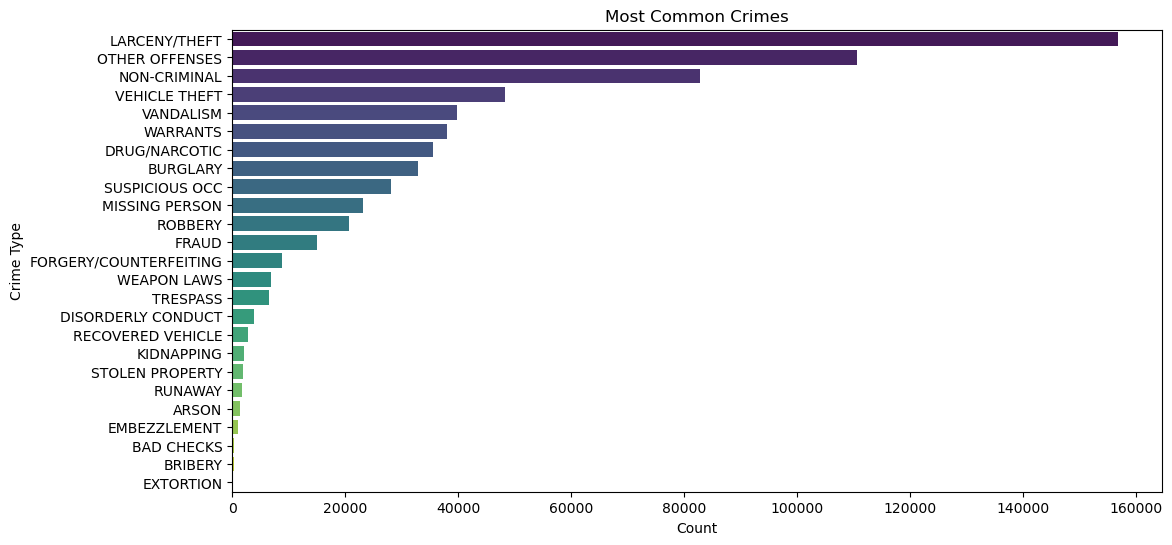

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))      # Set figure size
sns.countplot(y=df_cleaned['Category'], order=df_cleaned['Category'].value_counts().index, palette="viridis")
plt.title('Most Common Crimes')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

### 2️⃣ Crimes by Week Days Plot

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1944\1183169765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned['DayOfWeek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="viridis")


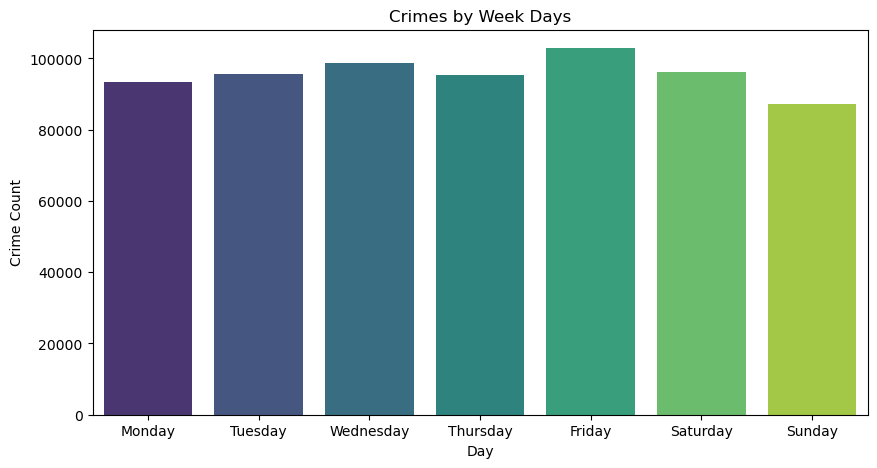

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_cleaned['DayOfWeek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="viridis")
plt.title('Crimes by Week Days')
plt.xlabel('Day')
plt.ylabel('Crime Count')
plt.show()


### 3️⃣ Crime Trends Over Time Plot

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1944\1855561988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearMonth'] = df_cleaned['Dates'].dt.to_period('M')     # Extract year and month for time series analysis


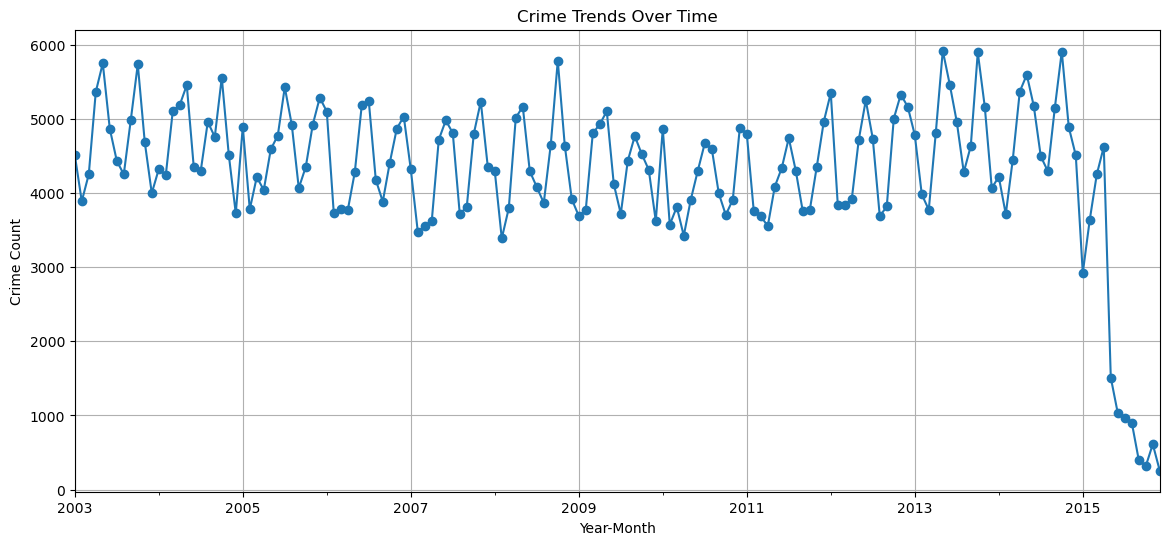

In [15]:
df_cleaned['YearMonth'] = df_cleaned['Dates'].dt.to_period('M')     # Extract year and month for time series analysis
plt.figure(figsize=(14,6))
df_cleaned['YearMonth'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Crime Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Crime Count')
plt.grid(True)
plt.show()


### 4️⃣ Crime Heatmap: Hour vs. Days of the Week

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1944\296986335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Hour'] = df_cleaned['Dates'].dt.hour  # Extract hour
C:\Users\DeLL\AppData\Local\Temp\ipykernel_1944\296986335.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_cleaned.pivot_table(index='DayOfWeek', columns='Hour', aggfunc='size')


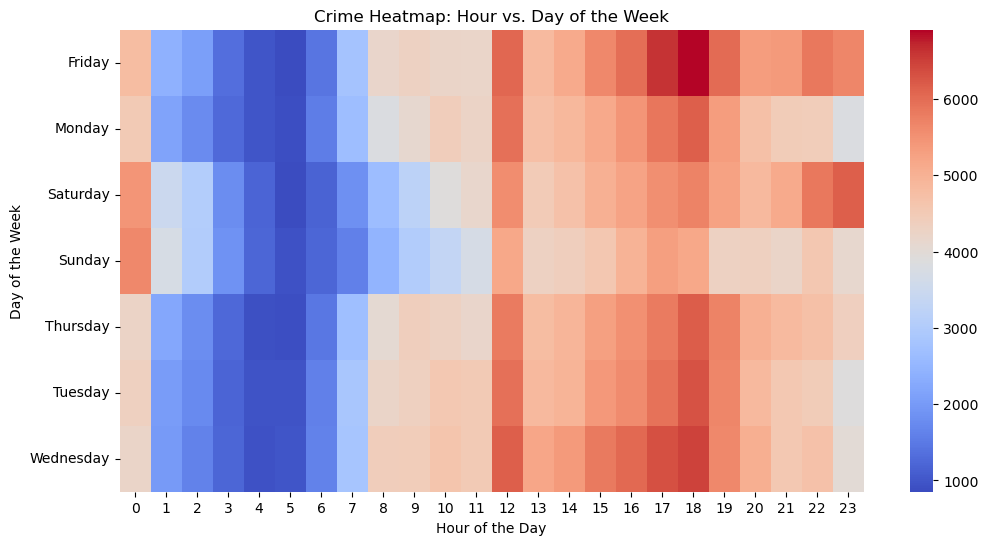

In [16]:

df_cleaned['Hour'] = df_cleaned['Dates'].dt.hour  # Extract hour

heatmap_data = df_cleaned.pivot_table(index='DayOfWeek', columns='Hour', aggfunc='size')
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Crime Heatmap: Hour vs. Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


# Level 1: Done ✅
## Next: Level 2 🏃‍♂️
### Mission is still on! 🔥💪